In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Data Loading

In [2]:
heart_df= pd.read_csv("heart.csv")

In [3]:
len(heart_df)

918

### Exploring data

In [4]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [155]:
# Describe Numerical Data
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [156]:
# Describe Categorical Data
heart_df.describe(include='O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [157]:
# Check Nulls
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [158]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [159]:
# Lets check the distribution of target variable
heart_df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

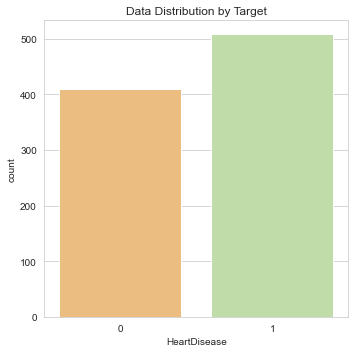

In [160]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Data Distribution by Target")
sns.countplot(x="HeartDisease", data=heart_df, palette='Spectral');

## Exploratory Data Visualisation

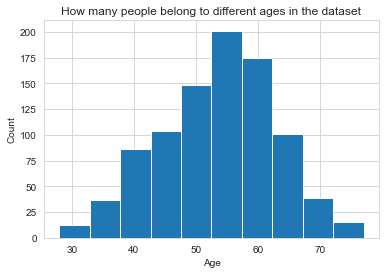

In [161]:
# Ages
plt.hist(heart_df["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("How many people belong to different ages in the dataset")
plt.show()

<AxesSubplot:title={'center':'How many people belong to each gender in the dataset by heardisease'}, xlabel='Sex', ylabel='count'>

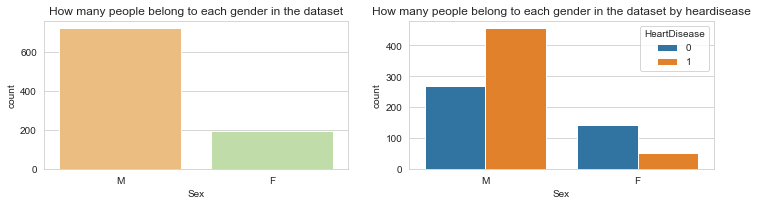

In [162]:
# Gender
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.title("How many people belong to each gender in the dataset")
sns.countplot(x="Sex", data=heart_df, palette='Spectral');
plt.subplot(2,2,2)
plt.title("How many people belong to each gender in the dataset by heardisease")
sns.countplot(x='Sex',hue='HeartDisease',data=heart_df)

In [163]:
heart_df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [164]:
heart_df.shape

(918, 12)

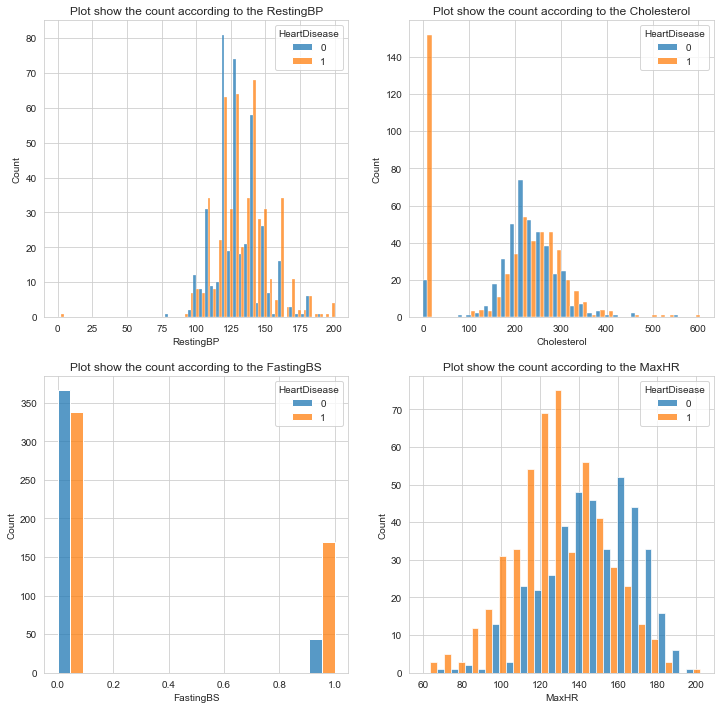

In [165]:
# Let's see numerical columns
fig,ax = plt.subplots(2,2,figsize=(12,12))
plt.subplot(2,2,1)
sns.histplot(data=heart_df,x='RestingBP',hue='HeartDisease', multiple="dodge")
plt.title("Plot show the count according to the RestingBP")
plt.subplot(2,2,2)

sns.histplot(x='Cholesterol',hue='HeartDisease',data=heart_df, multiple="dodge")
plt.title("Plot show the count according to the Cholesterol")
plt.subplot(2,2,3)

sns.histplot(x='FastingBS',hue='HeartDisease',data=heart_df, multiple="dodge")
plt.title("Plot show the count according to the FastingBS")
plt.subplot(2,2,4)

sns.histplot(x='MaxHR',hue='HeartDisease',data=heart_df, multiple="dodge")
plt.title("Plot show the count according to the MaxHR")
plt.show()

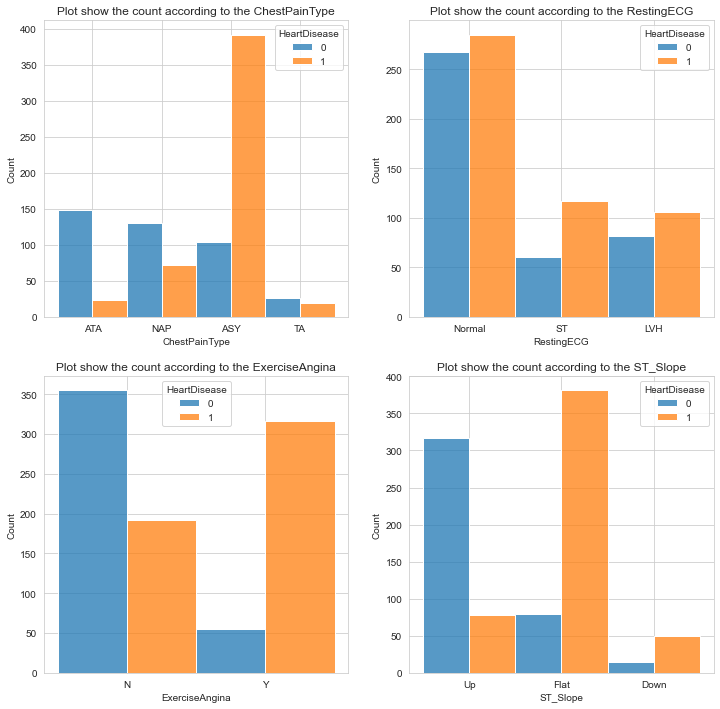

In [166]:
# Let's see other Categorical columns
fig,ax = plt.subplots(2,2,figsize=(12,12))
plt.subplot(2,2,1)
# sns.histplot(data=heart_df,x='ChestPainType',hue='Sex')
sns.histplot(x='ChestPainType',hue='HeartDisease',data=heart_df, multiple="dodge")
plt.title("Plot show the count according to the ChestPainType")
plt.subplot(2,2,2)
# sns.histplot(data=heart_df,x='RestingECG',hue='Sex')
sns.histplot(x='RestingECG',hue='HeartDisease',data=heart_df, multiple="dodge")
plt.title("Plot show the count according to the RestingECG")
plt.subplot(2,2,3)
# sns.histplot(data=heart_df,x='ExerciseAngina',hue='Sex')
sns.histplot(x='ExerciseAngina',hue='HeartDisease',data=heart_df, multiple="dodge")
plt.title("Plot show the count according to the ExerciseAngina")
plt.subplot(2,2,4)
# sns.histplot(data=heart_df,x='ST_Slope',hue='Sex')
sns.histplot(x='ST_Slope',hue='HeartDisease',data=heart_df, multiple="dodge")
plt.title("Plot show the count according to the ST_Slope")
plt.show()


In [167]:

# Let's See Output
heart_df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Correlation

In [168]:
heart_df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

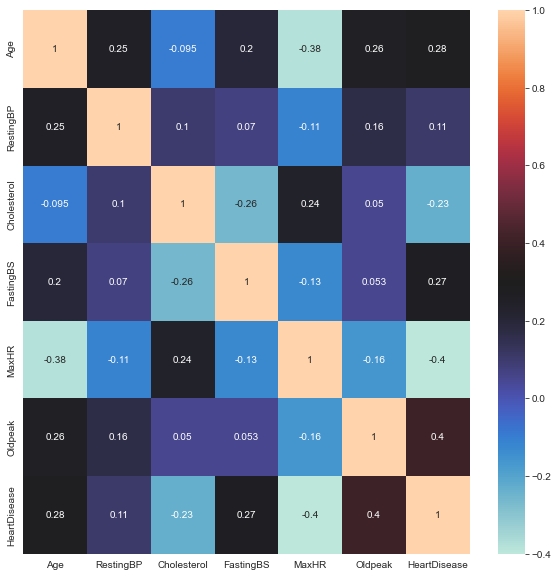

In [169]:
plt.figure(figsize=(10,10))
matrix=np.triu(heart_df.corr())
sns.heatmap(heart_df.corr(), annot=True,cmap="icefire")
# sns.heatmap(heart_df.corr(), annot=True, mask=matrix,square=True, cmap="icefire")
# plt.yticks(rotation=0)
# plt.show()

In [170]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

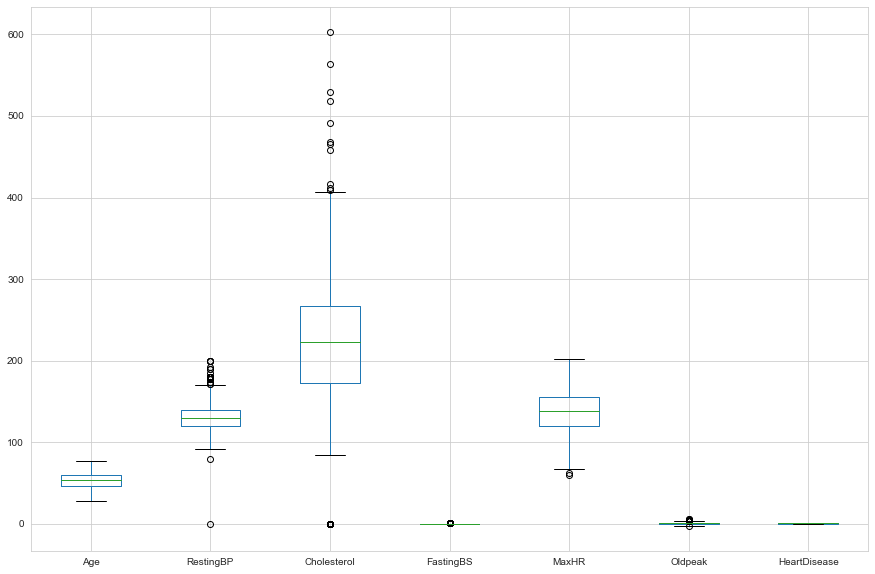

In [171]:
plt.figure(figsize =(15, 10))
heart_df.boxplot()
plt.show()

In [172]:
px.box(heart_df,x = "ChestPainType", y = "Age")


In [173]:
px.box(heart_df,x = "Age", y = "RestingBP")

In [174]:
px.box(heart_df,x = "Sex", y = "RestingBP")

## Data Preprocessing

In [175]:
X = heart_df.drop(columns=['HeartDisease'])
Y = heart_df['HeartDisease']


In [176]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Sex'] = le.fit_transform(X['Sex'])
X['ChestPainType'] = le.fit_transform(X['ChestPainType'])
X['RestingECG'] = le.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = le.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = le.fit_transform(X['ST_Slope'])

In [177]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [136]:
#Remove outliers in RestingBP,Cholesterol

index_to_drop = list(heart_df.loc[(heart_df.RestingBP == 0) | (heart_df.Cholesterol == 0)].index)
    
heart_df.drop(index_to_drop, inplace=True)
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [139]:
len(heart_df)

746

### Split Train and Test Data

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,stratify=Y,random_state=20)

In [141]:
print("X Train Shape :",X_train.shape)
print("y Train Shape :",Y_train.shape)
print("X Test Shape :",X_test.shape)
print("y Test Shape :",Y_test.shape)

X Train Shape : (615, 11)
y Train Shape : (615,)
X Test Shape : (303, 11)
y Test Shape : (303,)


In [142]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Training

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [144]:
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
svm_model = SVC(kernel='linear',probability=True)
rf_model = RandomForestClassifier(criterion='entropy',max_depth=4,n_estimators=25)
lr_model = LogisticRegression()

In [145]:
#Decision Tree classifier
tree_model.fit(X_train,Y_train)
tree_proba = tree_model.predict_proba(X_test)[:,1]
tree_predict = tree_model.predict(X_test)
treetrain_predict = tree_model.predict(X_train)

#SVM Classifier
svm_model.fit(X_train,Y_train)
svm_proba = svm_model.predict_proba(X_test)[:,1]
svm_predict = svm_model.predict(X_test)
svmtrain_predict = svm_model.predict(X_train)

# Random-Forest Classifier
rf_model.fit(X_train,Y_train)
rf_proba = rf_model.predict_proba(X_test)[:,1]
rf_predict = rf_model.predict(X_test)
rftrain_predict = rf_model.predict(X_train)

# Logistic Regression
lr_model.fit(X_train,Y_train)
lr_proba = lr_model.predict_proba(X_test)[:,1]
lr_predict = lr_model.predict(X_test)
lrtrain_predict = lr_model.predict(X_train)

### Model Evaluation

In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score, precision_score, recall_score, accuracy_score, classification_report


In [147]:
#Accuracy on testin data
score = accuracy_score(Y_test,tree_predict)
print("TreeScore :",round(score*100,2))

score = accuracy_score(Y_test,svm_predict)
print("SVMScore :",round(score*100,2))

score = accuracy_score(Y_test,rf_predict)
print("RandomForestScore :",round(score*100,2))

score = accuracy_score(Y_test,lr_predict)
print("LogisticRegressionScore :",round(score*100,2))

TreeScore : 81.19
SVMScore : 85.15
RandomForestScore : 86.14
LogisticRegressionScore : 84.16


<AxesSubplot:xlabel='algorithms', ylabel='Scores'>

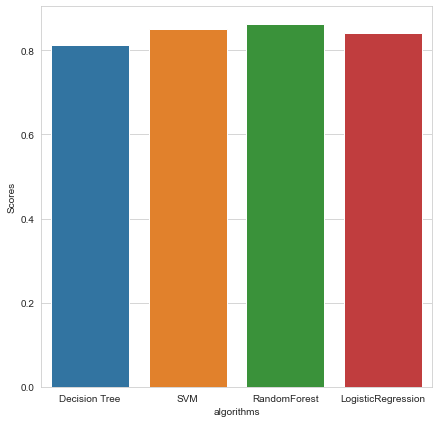

In [148]:
scores = pd.DataFrame(
    { "algorithms": ['Decision Tree','SVM', 'RandomForest','LogisticRegression'],
    "Scores": [accuracy_score(Y_test, tree_predict),
               accuracy_score(Y_test, svm_predict),
               accuracy_score(Y_test, rf_predict),
               accuracy_score(Y_test, lr_predict),] }
)
plt.figure(figsize=(7,7))
sns.barplot(x='algorithms', y='Scores', data=scores)

In [149]:
#Accuracy on training data
score_tree = accuracy_score(Y_train,treetrain_predict)
print("Score :",round(score_tree*100,2))

score_SVM = accuracy_score(Y_train,svmtrain_predict)
print("Score :",round(score_SVM*100,2))

score_RF = accuracy_score(Y_train,rftrain_predict)
print("Score :",round(score_RF*100,2))

score_LR = accuracy_score(Y_train,lrtrain_predict)
print("Score :",round(score_LR*100,2))

Score : 87.15
Score : 86.34
Score : 89.43
Score : 85.85


In [150]:
print('Classification Reports\n')
print(f'Decision Tree -------------------\n{classification_report(Y_test, tree_predict)}\n')
print(f'SVM -------------------\n{classification_report(Y_test, svm_predict)}\n')
print(f'Random Forest -------------------\n{classification_report(Y_test, rf_predict)}\n')
print(f'Logistic Regression -------------------\n{classification_report(Y_test, lr_predict)}\n')

Classification Reports

Decision Tree -------------------
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       135
           1       0.85      0.80      0.82       168

    accuracy                           0.81       303
   macro avg       0.81      0.81      0.81       303
weighted avg       0.82      0.81      0.81       303


SVM -------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       135
           1       0.86      0.87      0.87       168

    accuracy                           0.85       303
   macro avg       0.85      0.85      0.85       303
weighted avg       0.85      0.85      0.85       303


Random Forest -------------------
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       135
           1       0.87      0.88      0.88       168

    accuracy                           0.86       303
   macro a

# Cross Validation

In [193]:
#Ignore this part, this is in progress I am trying to do cross validation to evaluate the models

from sklearn.model_selection import KFold,cross_validate,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Decision Tree Classifier

### Leave one out

In [194]:
dt = DecisionTreeClassifier()
loocv = LeaveOneOut()

In [195]:
loocv_score = cross_val_score(dt,X,Y,cv=loocv)

In [196]:
loocv_score_mean = loocv_score.mean()
print("The average accuracy of Leave one out method with is",loocv_score_mean)

The average accuracy of Leave one out method with is 0.8017429193899782


### K-Fold Method

In [197]:
kf= KFold(n_splits=10)
kfold_score = cross_val_score(dt,X,Y,cv=kf)
print("The cross validation scores of k-fold method with 5 folds is",kfold_score)

The cross validation scores of k-fold method with 5 folds is [0.79347826 0.80434783 0.90217391 0.72826087 0.80434783 0.80434783
 0.83695652 0.69565217 0.74725275 0.72527473]


In [198]:
kfold_score_mean = kfold_score.mean()

In [199]:
print("The min accuracy from k-fold CV is",min(kfold_score))
print("The max accuracy from k-fold CV is", max(kfold_score))
print("The mean cross validation scores of k-fold method with 10 folds is",kfold_score_mean)

The min accuracy from k-fold CV is 0.6956521739130435
The max accuracy from k-fold CV is 0.9021739130434783
The mean cross validation scores of k-fold method with 10 folds is 0.7842092689918777


### Stratified K-Fold method

In [200]:
skfold = StratifiedKFold(n_splits=10)

In [201]:
skfold_score = cross_val_score(dt,X,Y,cv=skfold)

In [202]:
print("The accuracy of Stratified k-fold method with 10 folds is",skfold_score)

The accuracy of Stratified k-fold method with 10 folds is [0.79347826 0.82608696 0.7826087  0.82608696 0.83695652 0.80434783
 0.79347826 0.76086957 0.69230769 0.73626374]


In [203]:
skfold_score_mean = skfold_score.mean()
print("The accuracy of Stratifieid k-fold method with 10 folds is",skfold_score_mean)

The accuracy of Stratifieid k-fold method with 10 folds is 0.785248447204969


## Random Forest

In [223]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
      ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline,X,Y,
                                 cv=3,
                                 scoring='neg_mean_absolute_error')
   
    return scores.mean()

In [224]:
results = {}
for i in range(1,9):
    results[50*i] =  get_score(50*i)

In [225]:
print("MAE scores:\n", results.values())

MAE scores:
 dict_values([0.2584095860566449, 0.2559694989106754, 0.2549673202614379, 0.2555119825708061, 0.25622222222222224, 0.25578068264342774, 0.2549579831932773, 0.2555501089324619])


In [226]:
print("number of trees", results.keys())

number of trees dict_keys([50, 100, 150, 200, 250, 300, 350, 400])


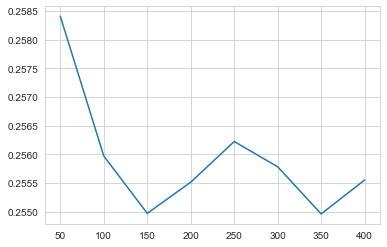

In [227]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [97]:
cv = KFold(n_splits =10, shuffle=True)

cv_results = cross_validate(svm_model,X, Y, cv=cv, return_train_score=False)

cv_mean = cv_results['test_score'].mean()
cv_std = cv_results['test_score'].std()

print('')
print('Accuracy mean SVM:',round(cv_mean,2))
print('')
print('Accuracy interval SVM:',round(cv_mean-2*cv_std,2),round(cv_mean+2*cv_std,2))
print('')



Accuracy mean SVM: 0.86

Accuracy interval SVM: 0.8 0.92



In [100]:
cv = KFold(n_splits =10, shuffle=True)

cv_results = cross_validate(tree_model,X, Y, cv=cv, return_train_score=False)

cv_mean = cv_results['test_score'].mean()
cv_std = cv_results['test_score'].std()

print('')
print('Accuracy mean Decision Tree:',round(cv_mean,2))
print('')
print('Accuracy interval Decision Tree:',round(cv_mean-2*cv_std,2),round(cv_mean+2*cv_std,2))
print('')



Accuracy mean Decision Tree: 0.83

Accuracy interval Decision Tree: 0.76 0.9



In [99]:
cv = KFold(n_splits =10, shuffle=True)

cv_results = cross_validate(rf_model,X, Y, cv=cv, return_train_score=False)

cv_mean = cv_results['test_score'].mean()
cv_std = cv_results['test_score'].std()

print('')
print('Accuracy mean Random Forest:',round(cv_mean,2))
print('')
print('Accuracy interval Random Forest:',round(cv_mean-2*cv_std,2),round(cv_mean+2*cv_std,2))
print('')


Accuracy mean Random Forest: 0.86

Accuracy interval Random Forest: 0.8 0.92

